In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('flatiron-regression-housing/training.csv')

In [3]:
df.head()

,id,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,81477,5,PLEASANT PLAINS,01 ONE FAMILY DWELLINGS,1,7702,320,,A5,66 CRANBERRY COURT,...,1,0,1,2744,1330,2002,1,A5,2017-03-24 00:00:00,414000
1,65088,4,JAMAICA HILLS,02 TWO FAMILY DWELLINGS,1,9847,12,,B1,85-39 164TH STREET,...,2,0,2,2100,2415,1955,1,B1,2017-08-08 00:00:00,860000
2,66531,4,LONG ISLAND CITY,29 COMMERCIAL GARAGES,4,299,35,,G1,31-11 GREENPOINT AVENUE,...,0,1,1,1858,1000,1931,4,G1,2016-11-18 00:00:00,-
3,43661,3,OCEAN PARKWAY-NORTH,10 COOPS - ELEVATOR APARTMENTS,2,6509,13,,D4,"825 OCEAN PARKWAY, 2J",...,0,0,0,0,0,1956,2,D4,2016-12-07 00:00:00,315000
4,2108,1,FINANCIAL,10 COOPS - ELEVATOR APARTMENTS,2,64,8,,D4,"55 LIBERTY STREET, 9A",...,0,0,0,-,-,1911,2,D4,2017-02-09 00:00:00,999000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63411 entries, 0 to 63410
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              63411 non-null  int64 
 1   BOROUGH                         63411 non-null  int64 
 2   NEIGHBORHOOD                    63411 non-null  object
 3   BUILDING CLASS CATEGORY         63411 non-null  object
 4   TAX CLASS AT PRESENT            63411 non-null  object
 5   BLOCK                           63411 non-null  int64 
 6   LOT                             63411 non-null  int64 
 7   EASE-MENT                       63411 non-null  object
 8   BUILDING CLASS AT PRESENT       63411 non-null  object
 9   ADDRESS                         63411 non-null  object
 10  APARTMENT NUMBER                63411 non-null  object
 11  ZIP CODE                        63411 non-null  int64 
 12  RESIDENTIAL UNITS               63411 non-null

In [5]:
df = df.replace(' -  ', np.nan)

df = df.dropna(subset=['SALE PRICE'])

In [6]:
#prices to int
df['SALE PRICE'] = df['SALE PRICE'].map(lambda x: int(x))
df['LAND SQUARE FEET'] = df['SALE PRICE'].map(lambda x: int(x))
df['GROSS SQUARE FEET'] = df['SALE PRICE'].map(lambda x: int(x))

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52451 entries, 0 to 63410
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              52451 non-null  int64 
 1   BOROUGH                         52451 non-null  int64 
 2   NEIGHBORHOOD                    52451 non-null  object
 3   BUILDING CLASS CATEGORY         52451 non-null  object
 4   TAX CLASS AT PRESENT            52451 non-null  object
 5   BLOCK                           52451 non-null  int64 
 6   LOT                             52451 non-null  int64 
 7   EASE-MENT                       52451 non-null  object
 8   BUILDING CLASS AT PRESENT       52451 non-null  object
 9   ADDRESS                         52451 non-null  object
 10  APARTMENT NUMBER                52451 non-null  object
 11  ZIP CODE                        52451 non-null  int64 
 12  RESIDENTIAL UNITS               52451 non-null

In [7]:
df.isna().sum()

id                                0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE DATE                         0
SALE PRICE                        0
dtype: int64

<AxesSubplot:>

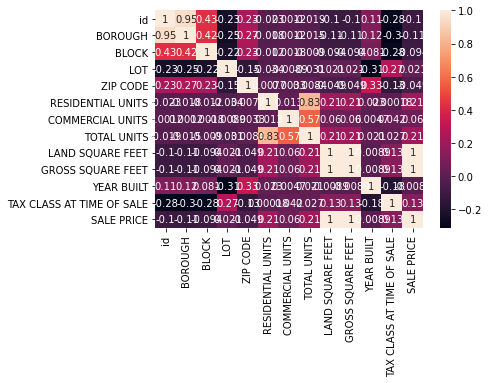

In [8]:
cor = df.corr()
sns.heatmap(cor,annot=True)

In [9]:
from sklearn.model_selection import train_test_split

- numerical: Borough, Tax class, block, lot, building class, res unit, com units (datatypes!), tot units, lsqft, gsqft, year built, tax class at sale, build class at sale, sale date, price

In [10]:
#target is sale price
#predictors are:
preds = ['BOROUGH','BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','YEAR BUILT']

X = df[preds]
y = df['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [11]:
linreg = LinearRegression()

In [12]:
linreg.fit(X_train,y_train)

LinearRegression()

In [13]:
train_pred = linreg.predict(X_train)

test_pred = linreg.predict(X_test)

In [14]:
train_score = mean_squared_error(y_train, train_pred)
test_score = mean_squared_error(y_test, test_pred)

print('Train score:', train_score)
print('Test score:', test_score)

Train score: 50264158661506.54
Test score: 85585592159131.5


dif: 35321433497624.96


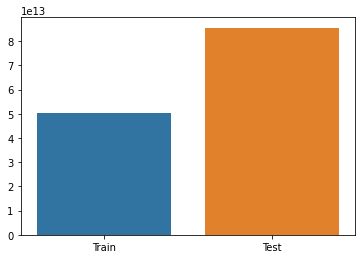

In [15]:
sns.barplot(['Train', 'Test'], [train_score, test_score]);
print('dif: {}'.format(test_score-train_score))

In [16]:
neighborhoods = df['NEIGHBORHOOD'].unique()
neighborhoods_series = pd.Series(neighborhoods)
neighborhoods_cat = neighborhoods_series.astype('category')

In [17]:
#try to label encode neighborhood
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

neighborhood_encode = lb_make.fit(neighborhoods_cat)

df['NEIGHBORHOOD'] = neighborhood_encode.transform(df['NEIGHBORHOOD'])

In [18]:
#add the encoded column and drop the original
df.head()

,id,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,81477,5,183,01 ONE FAMILY DWELLINGS,1,7702,320,,A5,66 CRANBERRY COURT,...,1,0,1,414000,414000,2002,1,A5,2017-03-24 00:00:00,414000
1,65088,4,126,02 TWO FAMILY DWELLINGS,1,9847,12,,B1,85-39 164TH STREET,...,2,0,2,860000,860000,1955,1,B1,2017-08-08 00:00:00,860000
3,43661,3,172,10 COOPS - ELEVATOR APARTMENTS,2,6509,13,,D4,"825 OCEAN PARKWAY, 2J",...,0,0,0,315000,315000,1956,2,D4,2016-12-07 00:00:00,315000
4,2108,1,78,10 COOPS - ELEVATOR APARTMENTS,2,64,8,,D4,"55 LIBERTY STREET, 9A",...,0,0,0,999000,999000,1911,2,D4,2017-02-09 00:00:00,999000
5,56549,4,87,01 ONE FAMILY DWELLINGS,1,5602,37,,A1,46-16 190TH STREET,...,1,0,1,760000,760000,1930,1,A1,2017-06-06 00:00:00,760000


In [19]:
#new train test set
preds = ['NEIGHBORHOOD','BOROUGH','ZIP CODE','TOTAL UNITS','YEAR BUILT','GROSS SQUARE FEET']

X = df[preds]
y = df['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [20]:
linreg = LinearRegression()

In [21]:
linreg.fit(X_train,y_train)

LinearRegression()

In [22]:
train_pred = linreg.predict(X_train)

test_pred = linreg.predict(X_test)

In [23]:
train_score = mean_squared_error(y_train, train_pred)
test_score = mean_squared_error(y_test, test_pred)

neigh_encode_diff = abs(test_score-train_score)

print('Train score:', train_score)
print('Test score:', test_score)

Train score: 3.0034667629585885e-16
Test score: 3.1713387325771587e-16


dif: 1.6787196961857022e-17


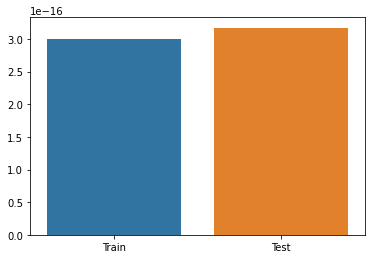

In [24]:
sns.barplot(['Train', 'Test'], [train_score, test_score]);
print('dif: {}'.format(test_score-train_score))

In [25]:
# #try a poly reg
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(2)

In [26]:

# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [27]:
# polyreg = LinearRegression()
# polyreg.fit(X_train_poly, y_train)


In [28]:
# # Training set predictions
# poly_train_preds = polyreg.predict(X_train_poly)

# # Test set predictions 
# poly_test_preds = polyreg.predict(X_test_poly)


In [29]:
# train_score = mean_squared_error(y_train, poly_train_preds)
# test_score = mean_squared_error(y_test, poly_test_preds)

# poly_diff = abs(test_score-train_score)


In [30]:
# sns.barplot(['Train', 'Test'], [train_score, test_score]);
# print('dif: {}'.format(test_score-train_score))

In [31]:
# plt.figure(figsize=(8, 5))
# plt.scatter(y_train, poly_train_preds, label='Model')
# plt.plot(y_train, y_train, label='Actual data')
# plt.title('Model vs data for training set')
# plt.legend();


In [32]:
# if neigh_encode_diff > poly_diff:
#     print('polynomial model is better')
# else:
#     print('neighborhood encode is better')

In [33]:
#remove potential collinear features
#new train test set
preds = ['NEIGHBORHOOD','YEAR BUILT','GROSS SQUARE FEET']

X = df[preds]
y = df['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [34]:
X_train

,NEIGHBORHOOD,YEAR BUILT,GROSS SQUARE FEET
32332,130,1950,85000
37209,135,1915,1600000
32160,212,1925,440000
31117,242,1905,375000
60421,66,1925,435527
...,...,...,...
60524,43,1915,10725000
39356,238,1899,580000
6259,177,0,1125000
14771,111,1910,2475000


In [35]:
linreg = LinearRegression()

In [36]:
linreg.fit(X_train,y_train)

LinearRegression()

In [37]:
train_pred = linreg.predict(X_train)

test_pred = linreg.predict(X_test)


In [38]:
train_score = mean_squared_error(y_train, train_pred)
test_score = mean_squared_error(y_test, test_pred)

neigh_encode_diff = abs(test_score-train_score)

print('Train score:', train_score)
print('Test score:', test_score)

Train score: 1.1625735570947056e-16
Test score: 1.0102703381018605e-16


dif: -1.523032189928451e-17


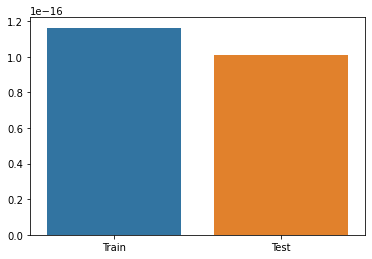

In [39]:
sns.barplot(['Train', 'Test'], [train_score, test_score]);
print('dif: {}'.format(test_score-train_score))

In [40]:
#testing
test_df = pd.read_csv('flatiron-regression-housing/testing.csv')

In [41]:
test_df = test_df.replace(' -  ', np.nan)

In [42]:
X_train['GROSS SQUARE FEET'].median()

530725.0

In [43]:
test_df['GROSS SQUARE FEET'].fillna(530725.0,inplace=True)

In [44]:
neighborhoods = test_df['NEIGHBORHOOD'].unique()
neighborhoods_series = pd.Series(neighborhoods)
neighborhoods_cat = neighborhoods_series.astype('category')

In [45]:
#try to label encode neighborhood
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

neighborhood_encode = lb_make.fit(neighborhoods_cat)

test_df['NEIGHBORHOOD'] = neighborhood_encode.transform(test_df['NEIGHBORHOOD'])

In [46]:
#new train test set
preds = ['NEIGHBORHOOD','YEAR BUILT','GROSS SQUARE FEET']

test_X = test_df[preds]

test_X

,NEIGHBORHOOD,YEAR BUILT,GROSS SQUARE FEET
0,16,1960,2145
1,11,1960,2880
2,86,1973,530725
3,7,0,530725
4,147,1930,3129
...,...,...,...
14950,238,0,0
14951,145,2014,530725
14952,191,1975,530725
14953,101,1900,530725


In [47]:
final_pred = linreg.predict(test_X)

In [50]:
test_df['target'] = final_pred
submission_df = test_df[['id', 'target']]

In [51]:
submission_df.shape

(14955, 2)

In [52]:
submission_df.to_csv('Warren_Jordan_submission.csv', index=False)